In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline  

In [174]:
loan_df = pd.read_csv('C:\DDriveData\Python\Great Lakes\Bank_Personal_Loan_Modelling-1.csv',sep=',')

In [175]:
loan_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [176]:
loan_master = loan_df.copy()

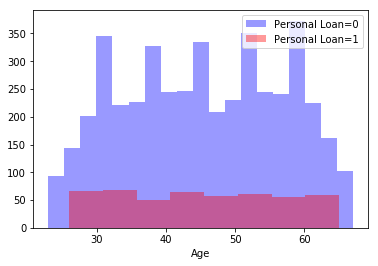

In [177]:
sns.distplot(loan_df[loan_df["Personal Loan"] == 0]['Age'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df["Personal Loan"] == 1]['Age'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

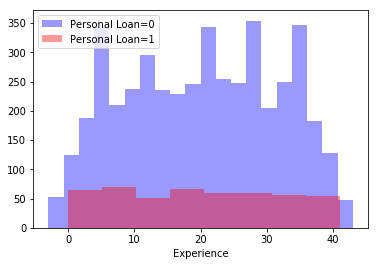

In [178]:
sns.distplot(loan_df[loan_df["Personal Loan"] == 0]['Experience'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df["Personal Loan"] == 1]['Experience'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

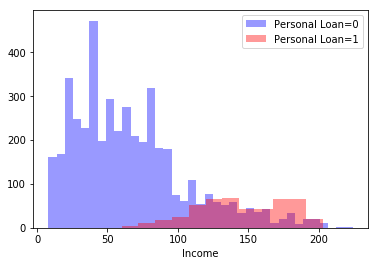

In [179]:
sns.distplot(loan_df[loan_df['Personal Loan'] == 0]['Income'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df['Personal Loan'] == 1]['Income'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

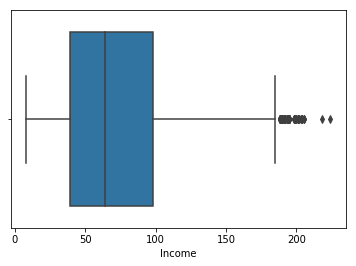

In [180]:
sns.boxplot(loan_df['Income'])

In [181]:
loan_df["Income"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01     10.0
0.05     18.0
0.10     22.0
0.25     39.0
0.50     64.0
0.75     98.0
0.90    145.0
0.95    170.0
0.99    193.0
1.00    224.0
Name: Income, dtype: float64

In [182]:
loan_df["income_cap"]=loan_df["Income"].map(lambda x: 186 if x>186 
     else x)

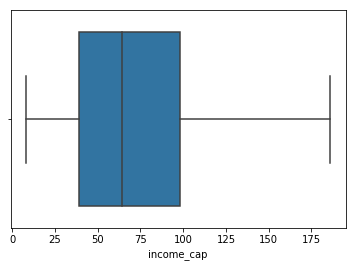

In [183]:
sns.boxplot(loan_df['income_cap'])

In [184]:
loan_df["income_cap"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01     10.0
0.05     18.0
0.10     22.0
0.25     39.0
0.50     64.0
0.75     98.0
0.90    145.0
0.95    170.0
0.99    186.0
1.00    186.0
Name: income_cap, dtype: float64

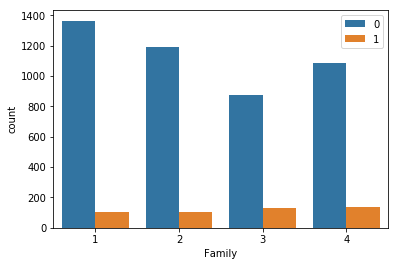

In [185]:
sns.countplot(x='Family',data=loan_df,hue='Personal Loan')
plt.legend()

In [186]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


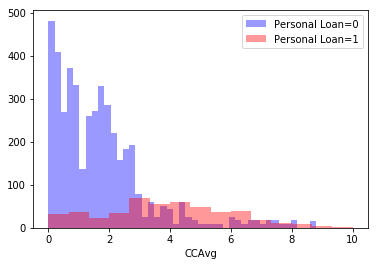

In [187]:
#sns.distplot(loan_df['CCAvg'],kde=False)

sns.distplot(loan_df[loan_df['Personal Loan'] == 0]['CCAvg'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df['Personal Loan'] == 1]['CCAvg'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

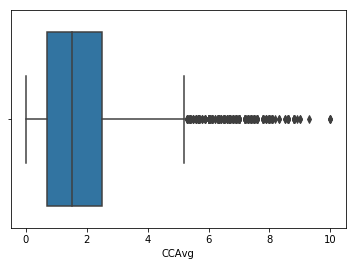

In [188]:
sns.boxplot(loan_df['CCAvg'])

In [189]:
loan_df["CCAvg"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01     0.0
0.05     0.1
0.10     0.3
0.25     0.7
0.50     1.5
0.75     2.5
0.90     4.3
0.95     6.0
0.99     8.0
1.00    10.0
Name: CCAvg, dtype: float64

In [190]:
loan_df['ccavg_cap'] = loan_df['CCAvg'].map(lambda x: 8 if x>8 else x)

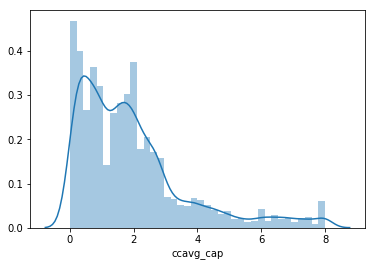

In [191]:
sns.distplot(loan_df['ccavg_cap'])

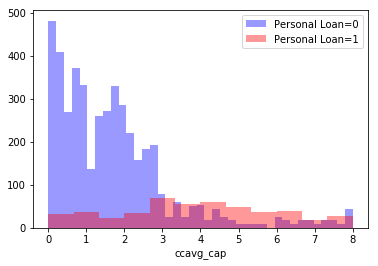

In [192]:
sns.distplot(loan_df[loan_df['Personal Loan'] == 0]['ccavg_cap'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df['Personal Loan'] == 1]['ccavg_cap'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

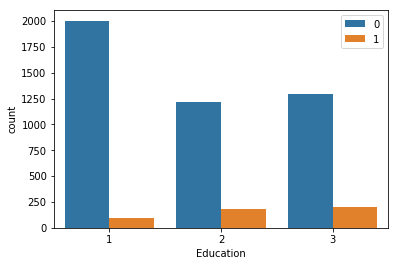

In [194]:
sns.countplot(x='Education',data=loan_df,hue='Personal Loan')
plt.legend()


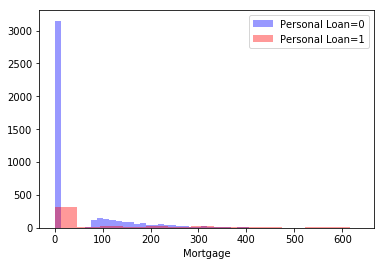

In [195]:
sns.distplot(loan_df[loan_df['Personal Loan'] == 0]['Mortgage'], color = 'b',label='Personal Loan=0',kde=False)
sns.distplot(loan_df[loan_df['Personal Loan'] == 1]['Mortgage'], color = 'r',label='Personal Loan=1',kde=False)
plt.legend()

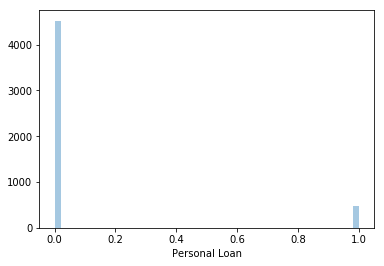

In [196]:
sns.distplot(loan_df['Personal Loan'],kde=False)

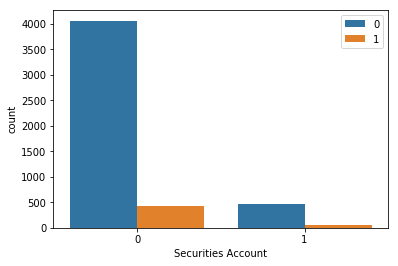

In [197]:
sns.countplot(x='Securities Account',data=loan_df,hue='Personal Loan')
plt.legend()

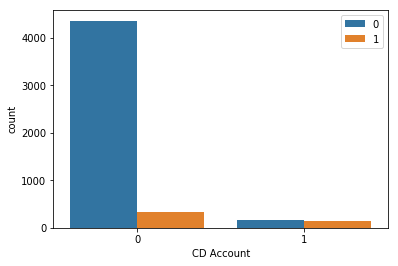

In [199]:
sns.countplot(x='CD Account',data=loan_df,hue='Personal Loan')
plt.legend()

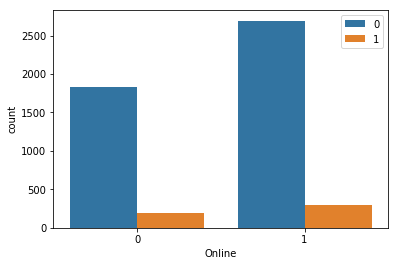

In [200]:
sns.countplot(x='Online',data=loan_df,hue='Personal Loan')
plt.legend()

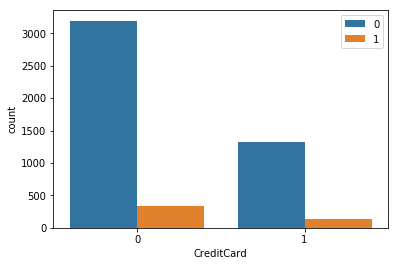

In [201]:
sns.countplot(x='CreditCard',data=loan_df,hue='Personal Loan')
plt.legend()

In [ ]:
## Analysing the features distribution following features looks more signification

## income, family, CCAvg, Education, Mortgage, Securities Account, CD account, online, Credit card.

## further IV function can be used to shortlist the features

## Also recursive feature elimination can be used to select the input features

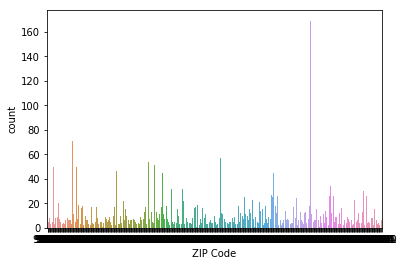

In [202]:
sns.countplot(loan_df['ZIP Code'])

In [203]:
loan_df['ZIP Code'].nunique()

467

In [204]:
loan_df['target'] = loan_df['Personal Loan']

In [205]:
loan_df['CD_Acc']=loan_df['CD Account']

In [206]:
loan_df.drop('CD Account',axis=1,inplace=True)

In [38]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
income_cap            5000 non-null int64
ccavg_cap             5000 non-null float64
target                5000 non-null int64
CD_Acc                5000 non-null int64
dtypes: float64(2), int64(15)
memory usage: 664.1 KB


In [39]:
exec(open("C:\DDriveData\Python\Great Lakes\Logistic Regression\iv_function.py").read())
iv = information_value(loan_df[['ID','Age','Experience','income_cap','ccavg_cap','ZIP Code','Family','Mortgage','Securities Account','CD_Acc','Online','CreditCard']],loan_df['target'])

C:\New folder\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\New folder\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


In [40]:
iv

,VAR_NAME,IV,BINS
0,income_cap,2.604722,4
1,ccavg_cap,1.172301,3
2,CD_Acc,0.615228,2
3,Family,0.059362,2
4,Mortgage,0.010016,2
5,ID,0.008476,4
6,Securities Account,0.005172,2
7,Experience,0.001032,2
8,Age,0.000811,2
9,Online,0.000456,2


In [41]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'Online', 'CreditCard', 'income_cap', 'ccavg_cap', 'target', 'CD_Acc'],
      dtype='object')

In [42]:
loan_df['edu'] = loan_df['Education']

In [43]:
X = loan_df[['Age','Experience','income_cap','ZIP Code','Family','ccavg_cap','edu','Mortgage','Securities Account','Online','CreditCard','CD_Acc']]

In [44]:
y = loan_df['target']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 999)

In [46]:
X_train.shape

(3500, 12)

In [47]:
y_train.shape

(3500,)

In [48]:
X_test.shape

(1500, 12)

In [49]:
y_test.shape

(1500,)

In [50]:
lr = LogisticRegression()

In [51]:
lr_model1 = lr.fit(X_train,y_train)

In [52]:
lr.score(X_train,y_train)

0.90542857142857147

In [53]:
pred1 = lr.predict(X_test)

In [54]:
lr.score(X_test,y_test)

0.91333333333333333

In [55]:
# confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
con_mat1 = confusion_matrix(y_test, pred1)

In [58]:
con_mat1

array([[1323,   41],
       [  89,   47]], dtype=int64)

In [59]:
# using all features the accuracy comes to 90% in train and 91% in test data set
# Using information value function - income,cc average, cd acc, family, mortgage - features seems important
# Next try using these 5 features and check accuracy

In [60]:
X = loan_df[['income_cap','Family','ccavg_cap','Mortgage','CD_Acc']]

#X=loan_df[['ccavg_cap','edu','Securities Account','CreditCard','CD_Acc']]

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 999)

In [62]:
lr_model2 = lr.fit(X_train,y_train)

In [63]:
lr.score(X_train,y_train)

0.92971428571428572

In [64]:
lr.score(X_test,y_test)

0.93266666666666664

In [65]:
pred2 = lr.predict(X_test)

In [66]:
con_mat2 = confusion_matrix(y_test, pred2)

In [67]:
con_mat2

array([[1330,   34],
       [  67,   69]], dtype=int64)

In [68]:
# minor improvement in accuracy by eliminating un important features

In [69]:
# Use Recurse feature elimination to try and check for overfitting

In [70]:
[['Age','Experience','income_cap','ZIP Code','Family','ccavg_cap','edu','Mortgage','Securities Account','Online','CreditCard','CD_Acc']]X = loan_df

In [71]:
y = loan_df.iloc[:, loan_df.columns == 'target']

In [72]:
y.columns

Index(['target'], dtype='object')

In [73]:
from sklearn.feature_selection import RFE

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 999)

In [75]:
rfe = RFE(lr, 5,step=1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True  True False  True False  True  True]
[4 5 6 8 3 1 1 7 1 2 1 1]


In [76]:
X_train.columns

Index(['Age', 'Experience', 'income_cap', 'ZIP Code', 'Family', 'ccavg_cap',
       'edu', 'Mortgage', 'Securities Account', 'Online', 'CreditCard',
       'CD_Acc'],
      dtype='object')

In [77]:
X=loan_df[['ccavg_cap','edu','Securities Account','CreditCard','CD_Acc']]

In [78]:
#X = loan_df[['Age','Experience','income_cap','ZIP Code','Family','ccavg_cap','edu','Mortgage','Securities Account','Online','CreditCard','CD_Acc']]

In [79]:
y = loan_df.iloc[:, loan_df.columns == 'target']

In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

C:\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.341520
         Iterations 7
                          Results: Logit
Model:               Logit             Pseudo R-squared:  -0.080   
Dependent Variable:  target            AIC:               3425.1995
Date:                2019-02-02 11:51  BIC:               3457.7855
No. Observations:    5000              Log-Likelihood:    -1707.6  
Df Model:            4                 LL-Null:           -1581.0  
Df Residuals:        4995              LLR p-value:       1.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ccavg_cap           0.0845   0.0196   4.3128 0.0000  0.0461  0.1229
edu                -1.0272   0.0368 -27.9

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 999)

In [82]:
lr_model3 = lr.fit(X_train,y_train)

C:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
lr.score(X_train,y_train)

0.92428571428571427

In [84]:
pred3 = lr.predict(X_test)

In [85]:
con_mat3 = confusion_matrix(y_test, pred3)

In [86]:
con_mat3

array([[1344,   20],
       [  85,   51]], dtype=int64)

In [87]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [88]:
recall_score(y_test,pred1)

0.34558823529411764

In [89]:
recall_score(y_test,pred2)

0.50735294117647056

In [90]:
recall_score(y_test,pred3)

0.375

In [91]:
from sklearn.metrics import classification_report

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1364
          1       0.53      0.35      0.42       136

avg / total       0.90      0.91      0.90      1500



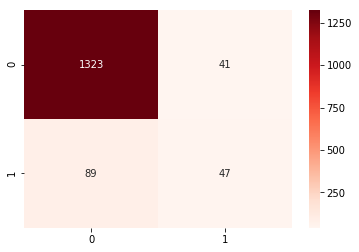

In [92]:
print(classification_report(y_test,pred1))
confusion_matrix(y_test,pred1)
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, cmap='Reds',fmt='g')

             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1364
          1       0.67      0.51      0.58       136

avg / total       0.93      0.93      0.93      1500



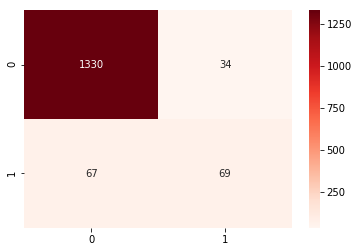

In [93]:
print(classification_report(y_test,pred2))
confusion_matrix(y_test,pred2)
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, cmap='Reds',fmt='g')

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      1364
          1       0.72      0.38      0.49       136

avg / total       0.92      0.93      0.92      1500



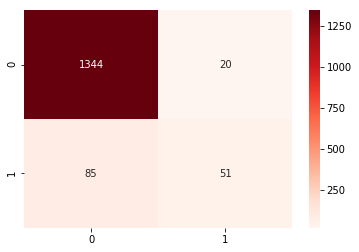

In [94]:
print(classification_report(y_test,pred3))
confusion_matrix(y_test,pred3)
sns.heatmap(confusion_matrix(y_test,pred3), annot=True, cmap='Reds',fmt='g')

In [95]:
# built 3 different logistics model with various combinations of input features based on IV analysis, RFE analysis
# and visualizing the graphs.

In [ ]:
# As per the above analysis model 2 has better accuracy and looks to be a better model

In [96]:
# calculating probabilities and plotting AUC curve

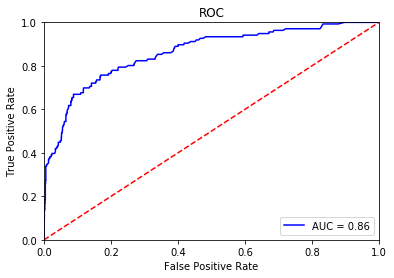

In [97]:
from sklearn import metrics
prob = lr_model2.predict_proba(X_test)
preds = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
## knn model

In [139]:
NNH = KNeighborsClassifier(n_neighbors = 19, weights = 'uniform', metric = 'euclidean')

In [140]:
#X = loan_df[['Age','Experience','income_cap','ZIP Code','Family','ccavg_cap','edu','Mortgage','Securities Account','Online','CreditCard','CD_Acc']]

In [141]:
#y = loan_df.iloc[:, loan_df.columns == 'target']

In [142]:
NNH.fit(X_train, y_train)

C:\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [143]:
pred_knn = NNH.predict(X_test)

In [144]:
confusion_matrix(y_test,pred_knn)

array([[1355,    9],
       [  70,   66]], dtype=int64)

In [145]:
print(classification_report(y_test,pred_knn))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1364
          1       0.88      0.49      0.63       136

avg / total       0.94      0.95      0.94      1500



In [146]:
NNH.score(X_test,y_test)

0.94733333333333336

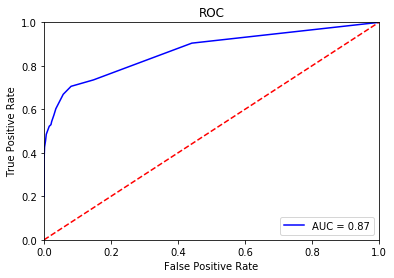

In [147]:
from sklearn import metrics
prob = NNH.predict_proba(X_test)
preds = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
# Naive Bayes model

In [113]:
GNB = GaussianNB()

In [114]:
GNB.fit(X_train,y_train)

C:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [115]:
pred_GNB = GNB.predict(X_test)

In [116]:
print(metrics.classification_report(y_test, pred_GNB))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1364
          1       0.40      0.42      0.41       136

avg / total       0.89      0.89      0.89      1500



In [118]:
confusion_matrix(y_test,pred_GNB)

array([[1280,   84],
       [  79,   57]], dtype=int64)

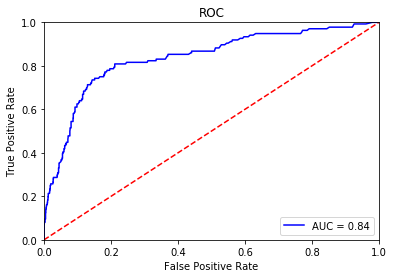

In [120]:
from sklearn import metrics
prob = GNB.predict_proba(X_test)
preds = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()